In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [29]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [30]:
# reset the index
df.reset_index(drop=True, inplace=True)
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [31]:
# Explore the dataset
print("Dataset columns:")
print(df.columns)
print("\nDataset shape:")
print(df.shape)

Dataset columns:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Dataset shape:
(284807, 31)


In [32]:
df['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [33]:
# change time feature from seconds to hour
df['Hours'] = df['Time'] / 3600
print(df['Hours'])  

0          0.000000
1          0.000000
2          0.000278
3          0.000278
4          0.000556
            ...    
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Hours, Length: 284807, dtype: float64


In [34]:
# Display the first few rows of the dataset
print("\nFirst few rows:")
print(df.head())


First few rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.502292   

        V27    

In [35]:
# Display the summary statistics of the dataset
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  

In [36]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())
print("\nTotal missing values:")
print(df.isnull().sum().sum())


Missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Hours     0
dtype: int64

Total missing values:
0


In [37]:
# Check for duplicate rows
print("\nDuplicate rows:")
print(df.duplicated().sum())
print(df.duplicated())


Duplicate rows:
1081
0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool


In [38]:
# Display the class distribution
print("\nClass distribution:")  
print(df['Class'].value_counts())


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [39]:
#          EXPLORAYORY DATA ANALYSIS 
#        V  i s u a l i z a t i o n  S 

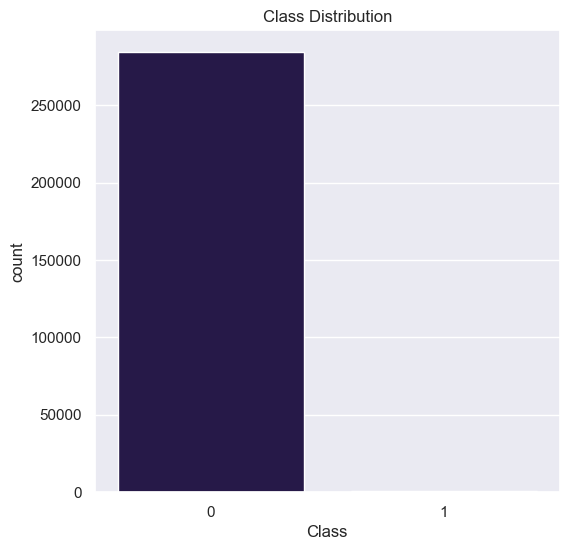

In [40]:
# Plot Class distribution
sns.set_theme(style="darkgrid")
sns.set_palette("magma")

plt.figure(figsize=(6, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


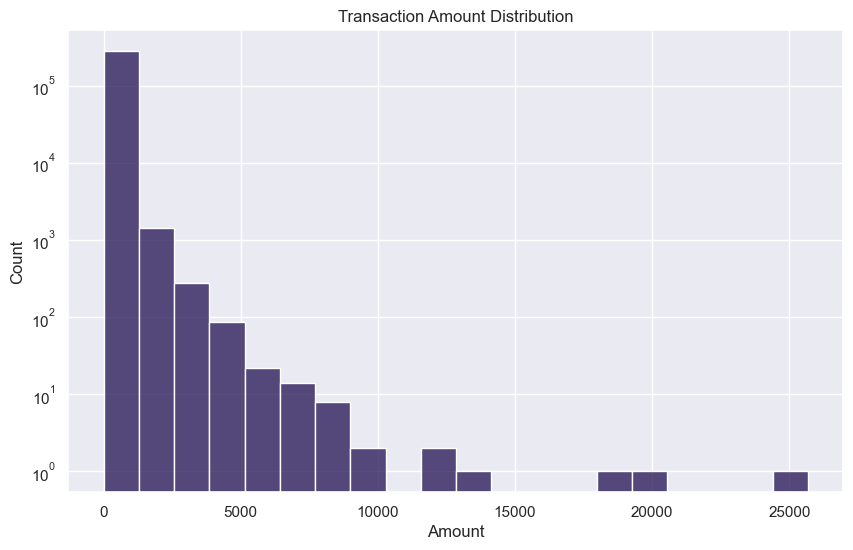

In [41]:
# Plot Amount distribution
plt.figure(figsize=(10, 6))
plt.yscale('log')   
sns.histplot(data=df, x='Amount', bins=20)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

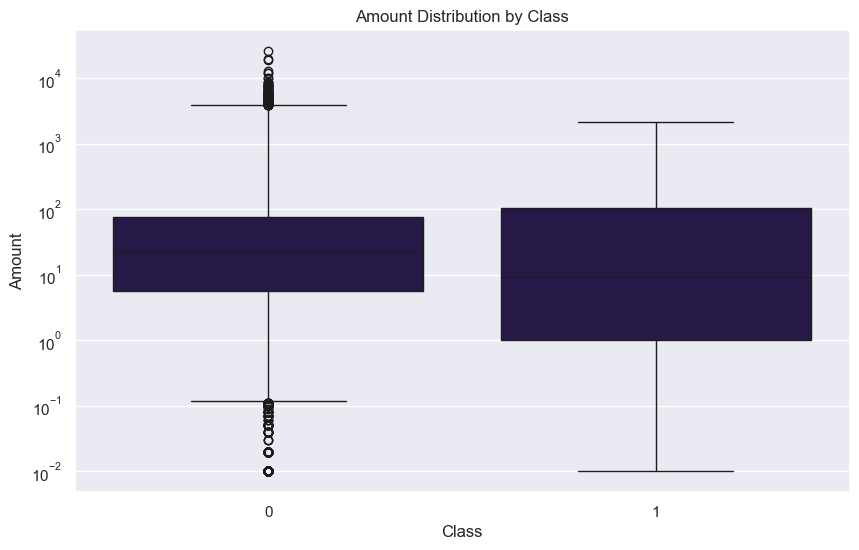

In [42]:
# Plot Amount distribution for both classes separately
plt.figure(figsize=(10, 6))
plt.yscale('log')
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount Distribution by Class')
plt.show()

In [43]:
#---TIME DISTRIBUTION ANALYSIS---

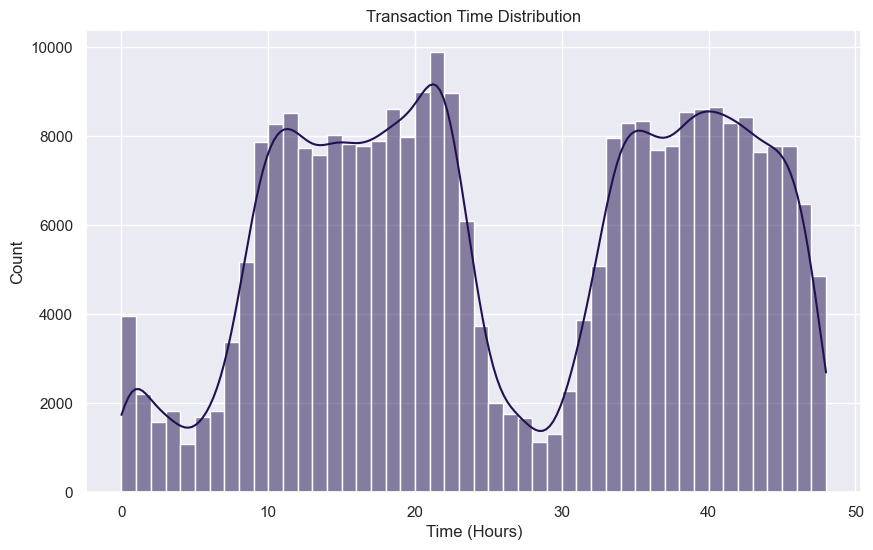

In [44]:
# Set seaborn theme with viridis colormap

# Time distribution in hours
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Hours', bins=48, kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Time (Hours)')
plt.ylabel('Count')
plt.show()

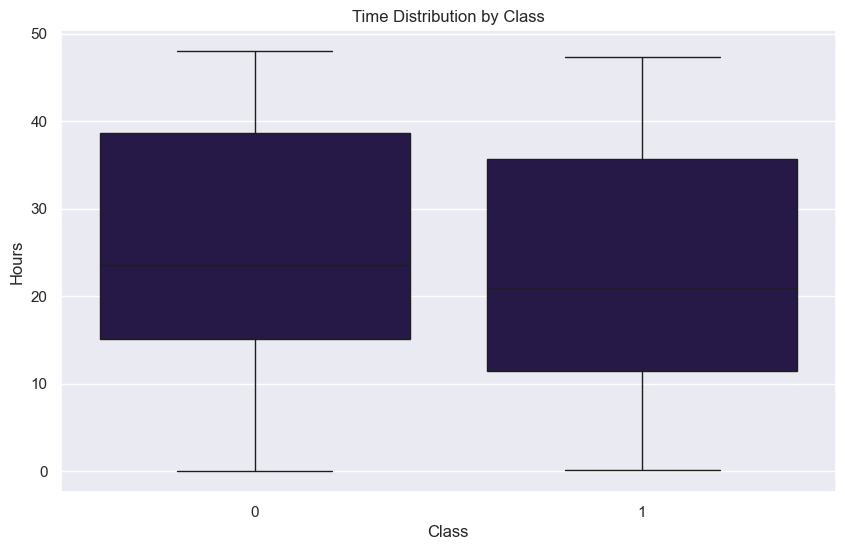

In [45]:
# Time distribution for both classes separately
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Hours', data=df)
plt.title('Time Distribution by Class')
plt.show()

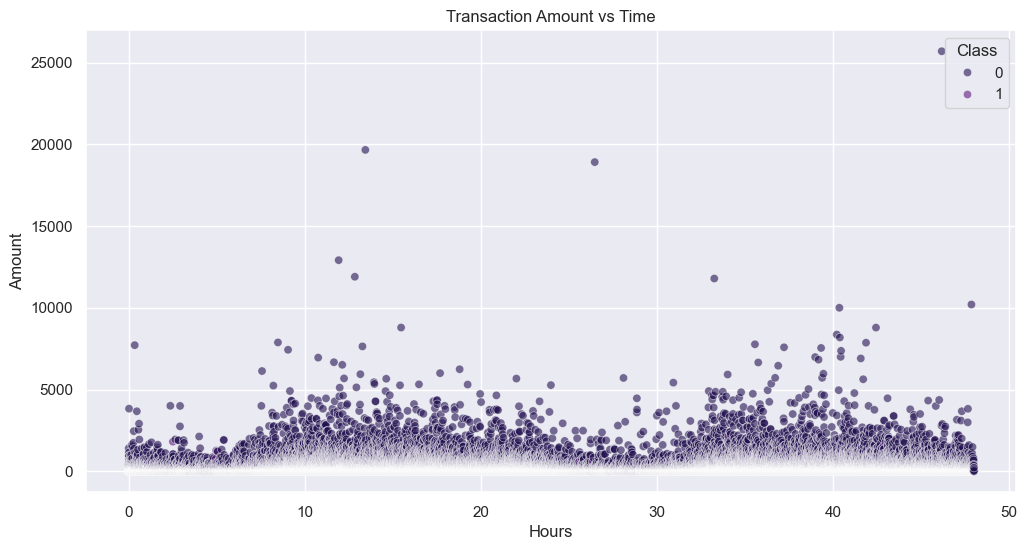

In [46]:
# Transaction frequency over time
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Hours', y='Amount', hue='Class', alpha=0.6)
plt.title('Transaction Amount vs Time')
plt.show()

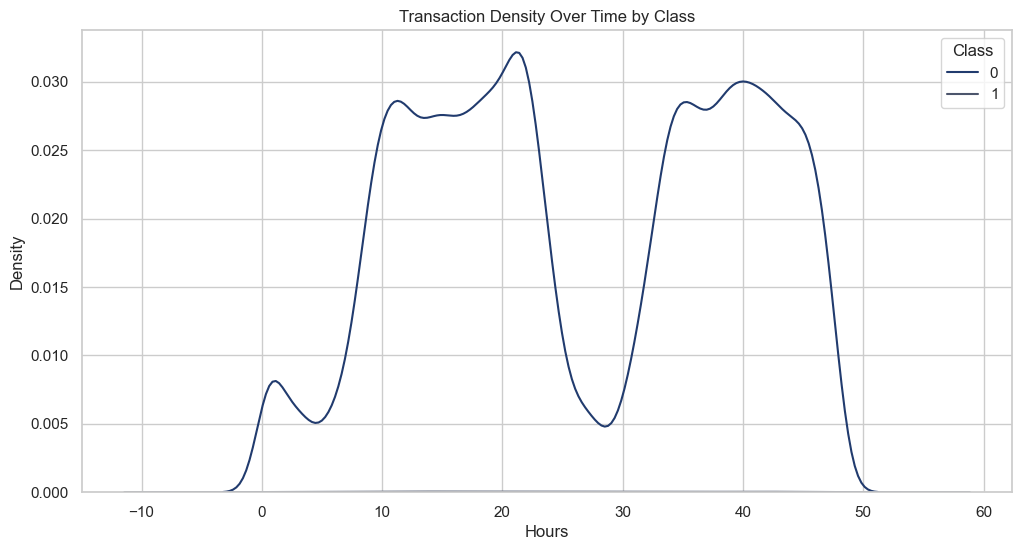

In [47]:
# Transaction density over time
sns.set_theme(style="whitegrid")
sns.set_palette("cividis")

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Hours', hue='Class')
plt.title('Transaction Density Over Time by Class')
plt.show()

In [48]:
#              ---FEATURE DISTRIBUTIONS---

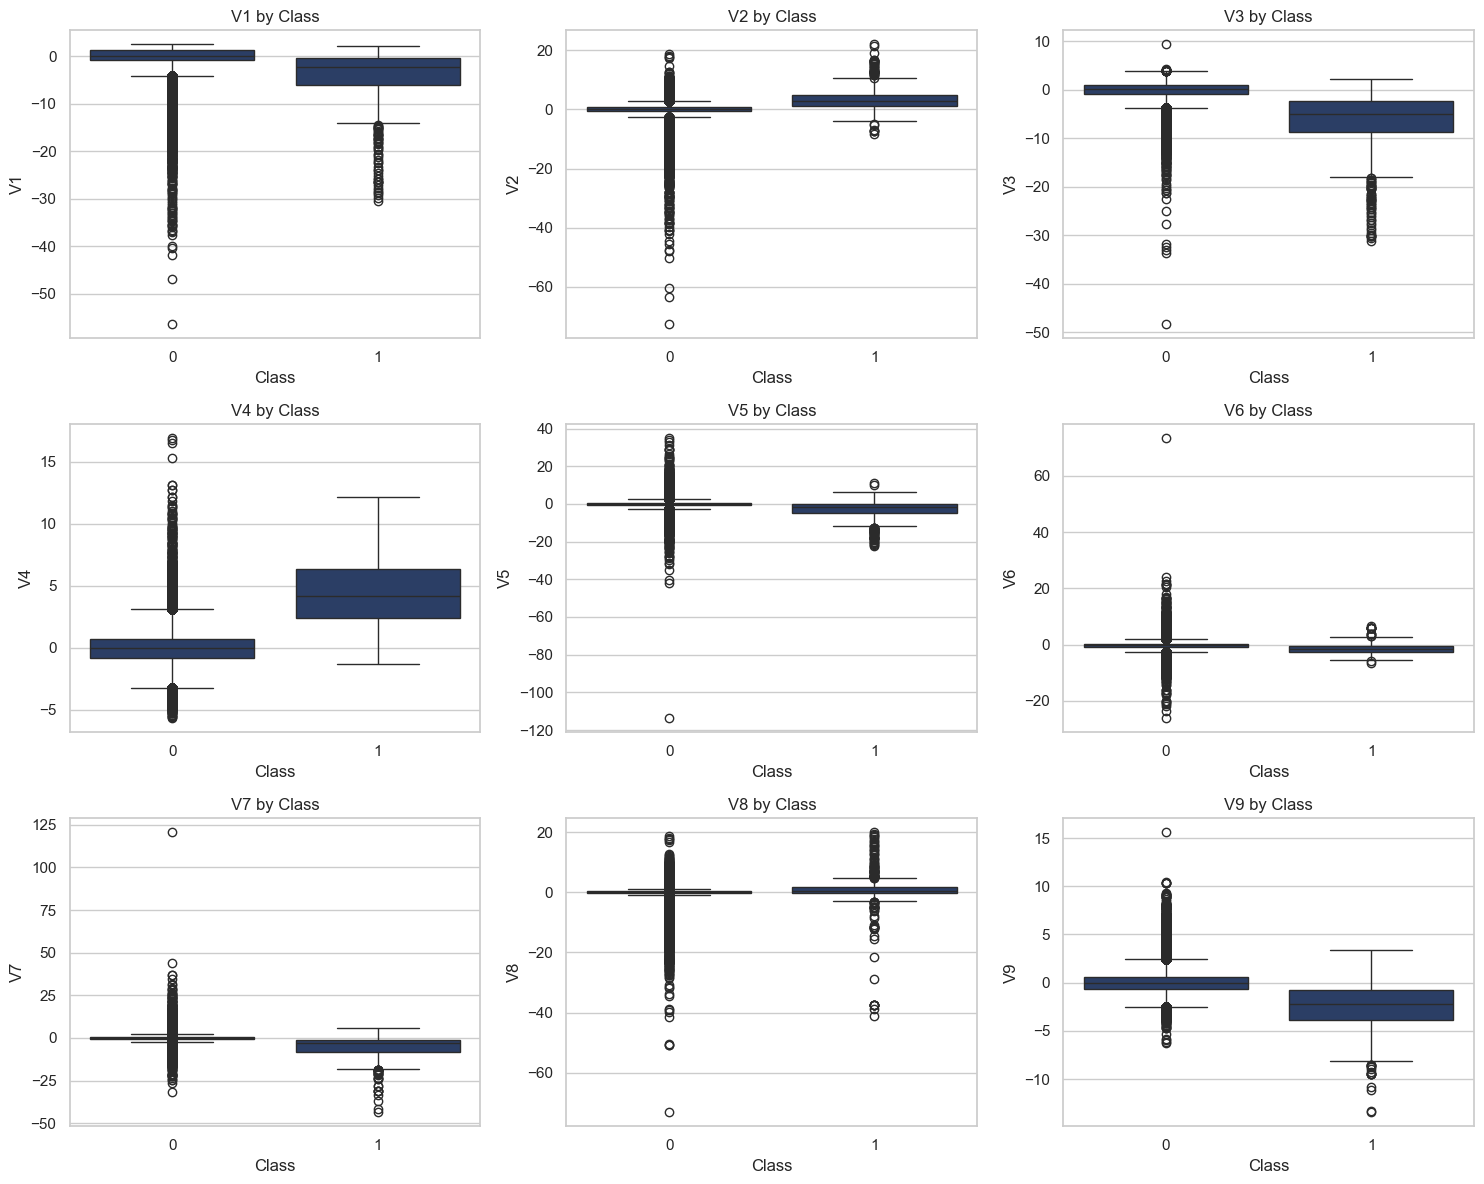

In [49]:
# Box plots for features by class
def plot_feature_boxplots(df, features, rows=3, cols=3):
    plt.figure(figsize=(15, 4*rows))
    for i, feature in enumerate(features, 1):
        plt.subplot(rows, cols, i)
        sns.boxplot(x='Class', y=feature, data=df)
        plt.title(f'{feature} by Class')
    plt.tight_layout()
    plt.show()

features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']  
plot_feature_boxplots(df, features)

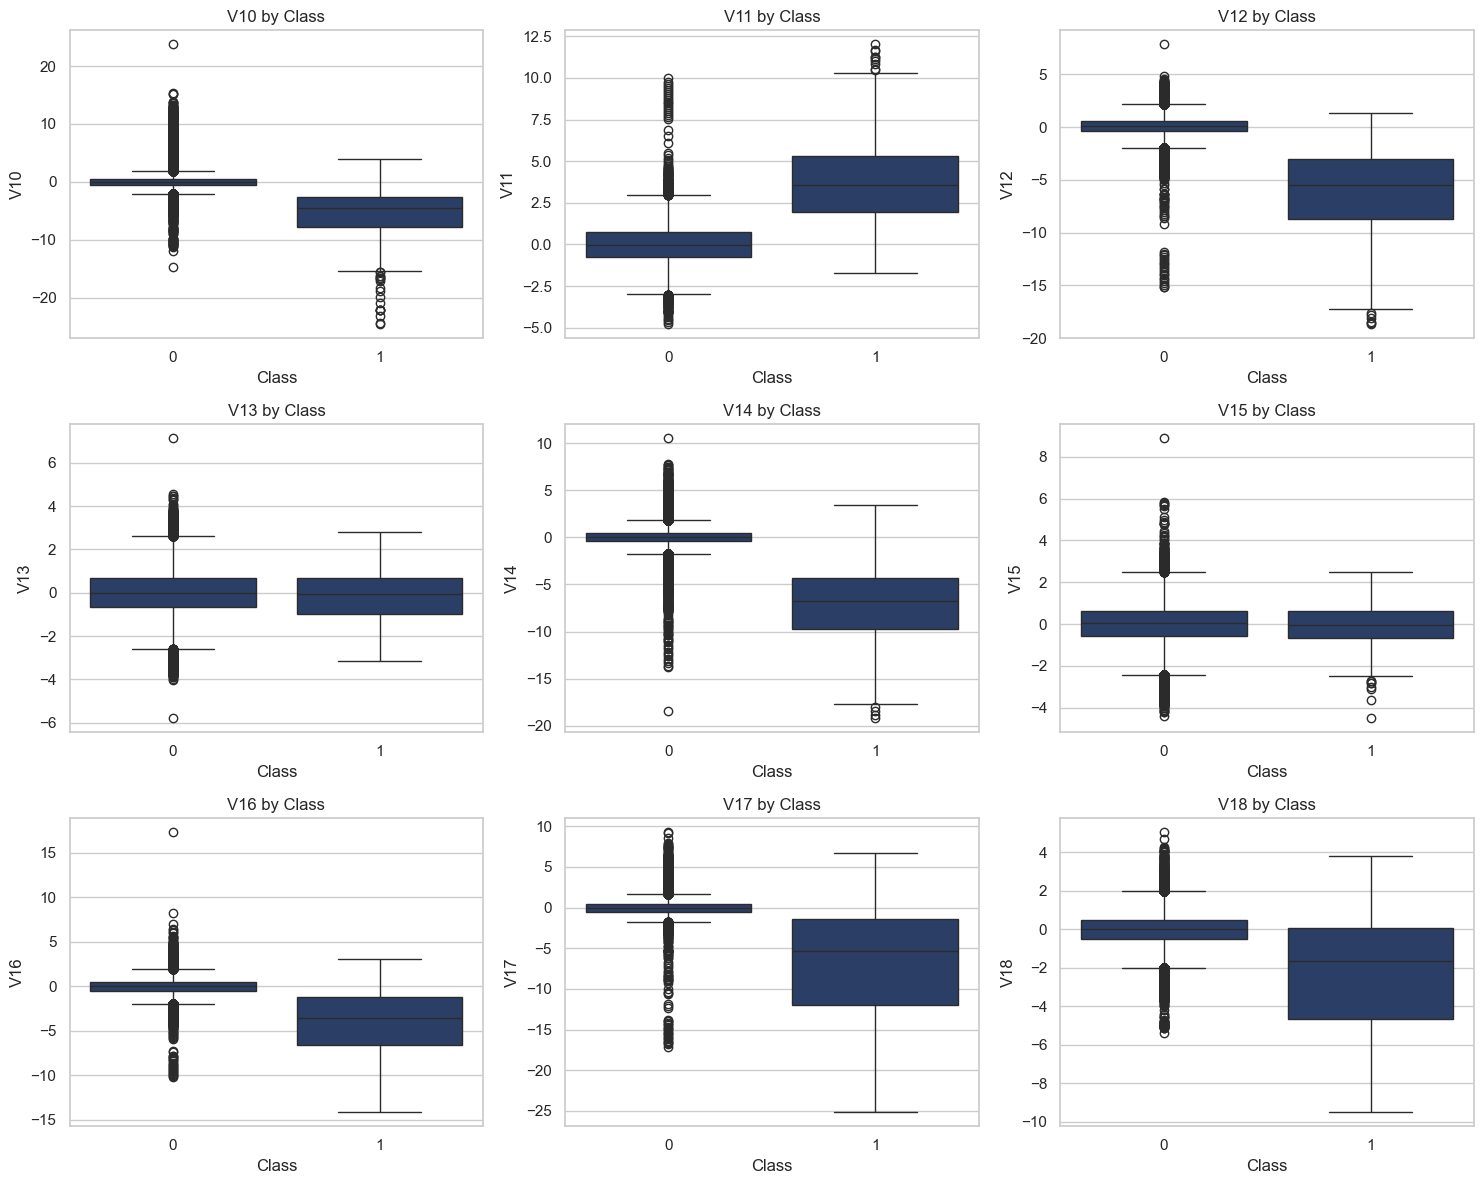

In [50]:
features = ['V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18']    # ADD MORE UNTIL V28
plot_feature_boxplots(df, features)

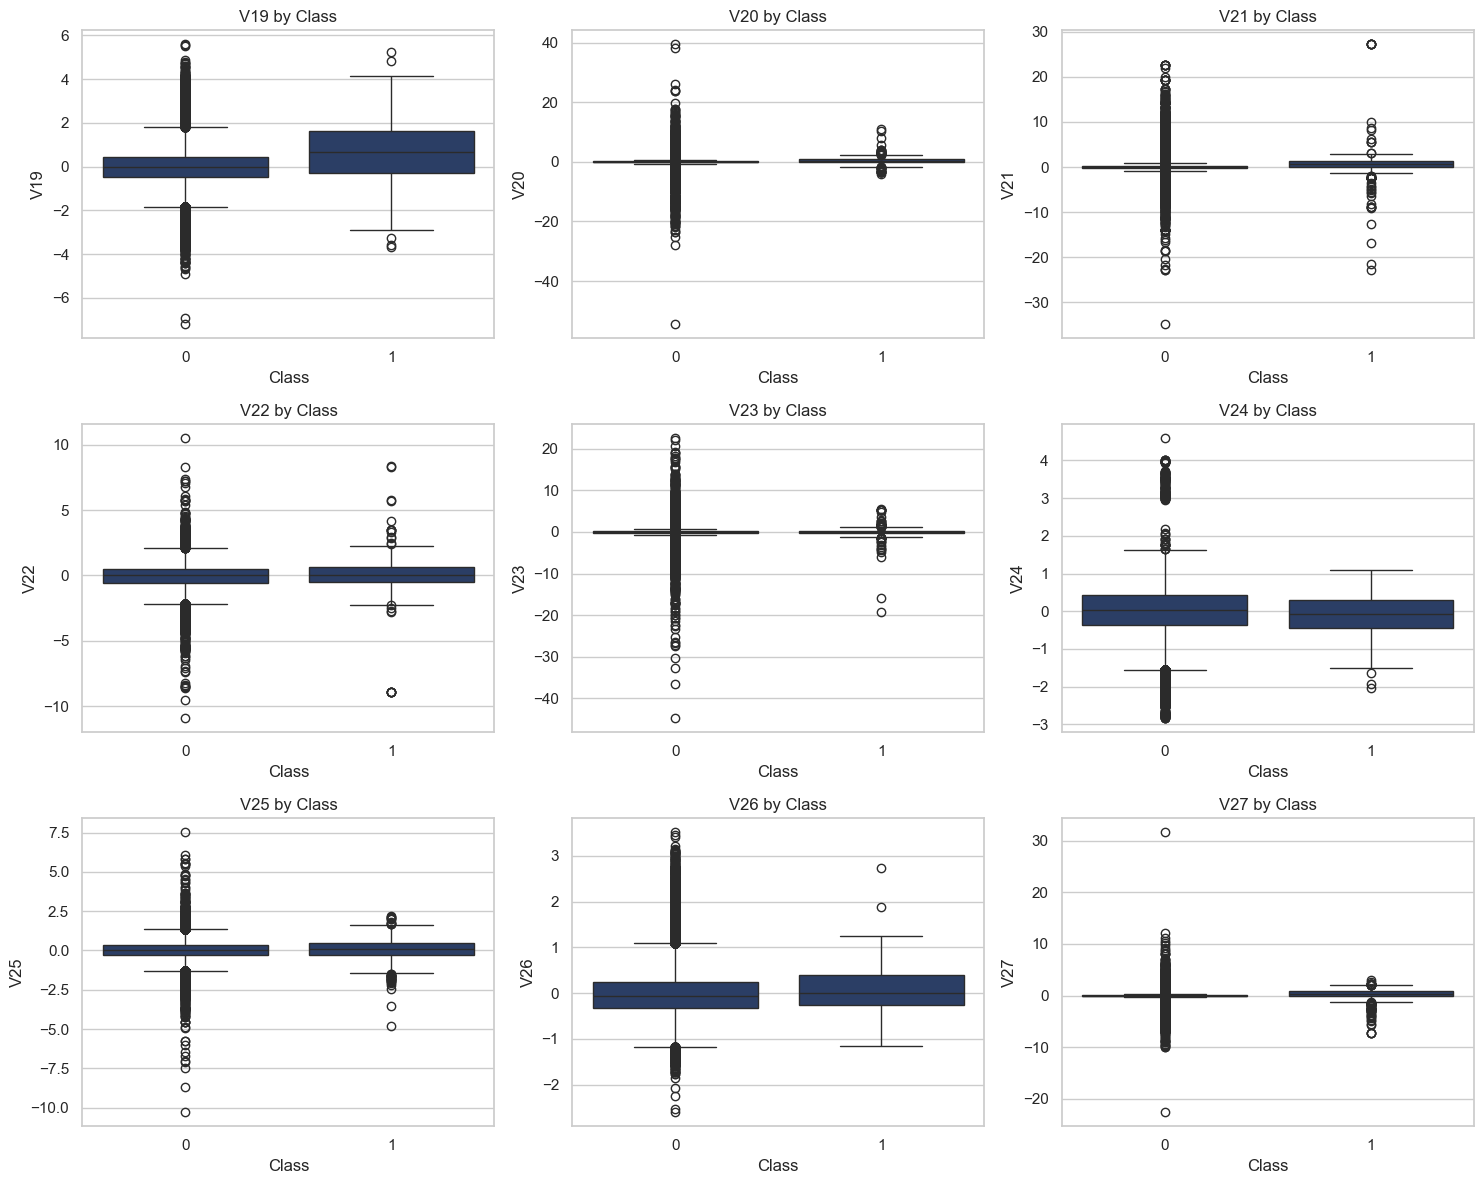

In [51]:
features = ['V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27']    # ADD MORE UNTIL V28
plot_feature_boxplots(df, features)

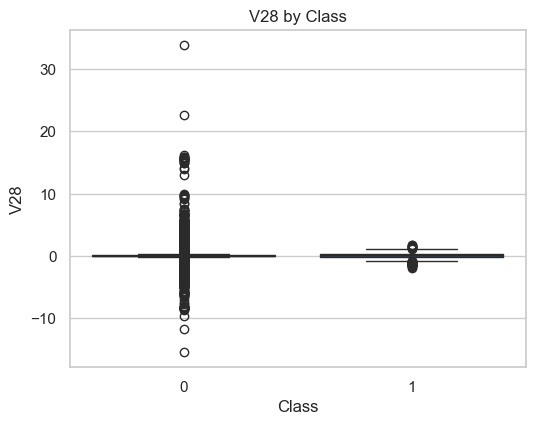

In [52]:
features = ['V28']    # ADD MORE UNTIL V28
plot_feature_boxplots(df, features)

In [53]:
# Distribution of numeric features(V1-V28)
# Define function for visualizing plots
def plot_feature_distributions(df, features, rows=3, cols=3):
    plt.figure(figsize=(15, 4*rows))
    for i, feature in enumerate(features, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(data=df, x=feature, hue='Class', multiple="stack")
        plt.yscale('log')
        plt.xlabel(" ")
        plt.title(f'{feature} Distribution by Class')
    plt.tight_layout()
    plt.show()
features = ['V28']

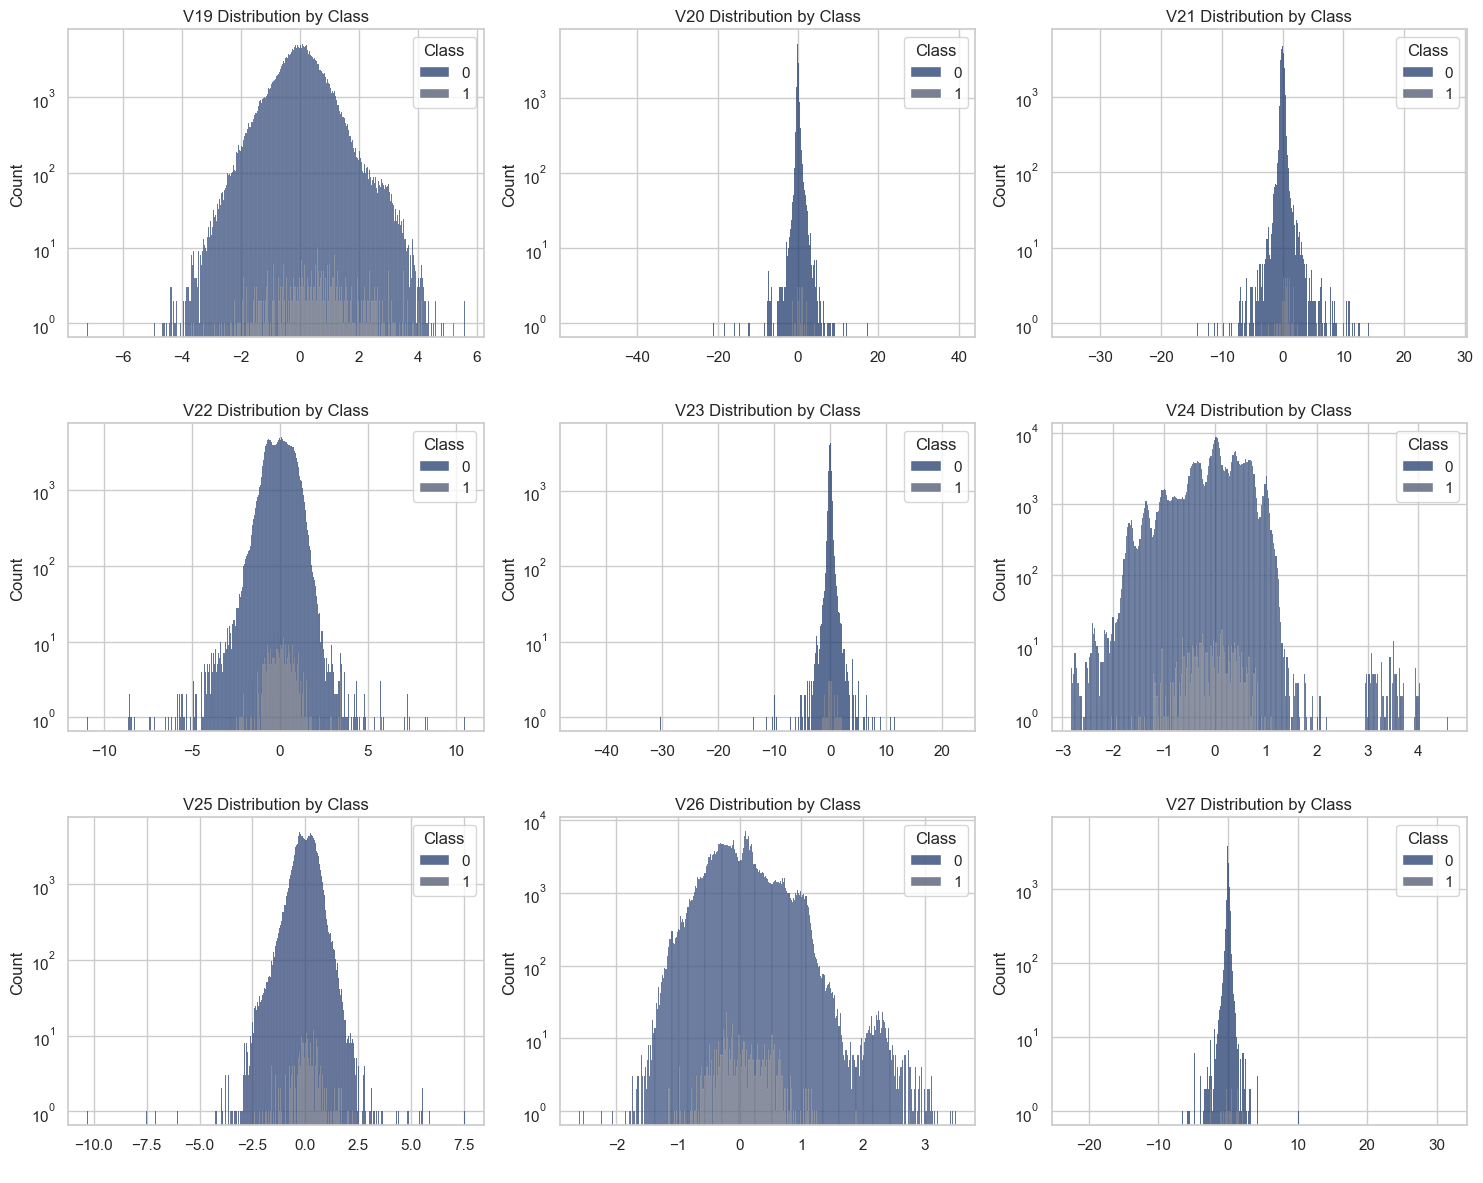

In [54]:
# Use for V1-V28 features
features = ['V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27'] 
plot_feature_distributions(df, features)

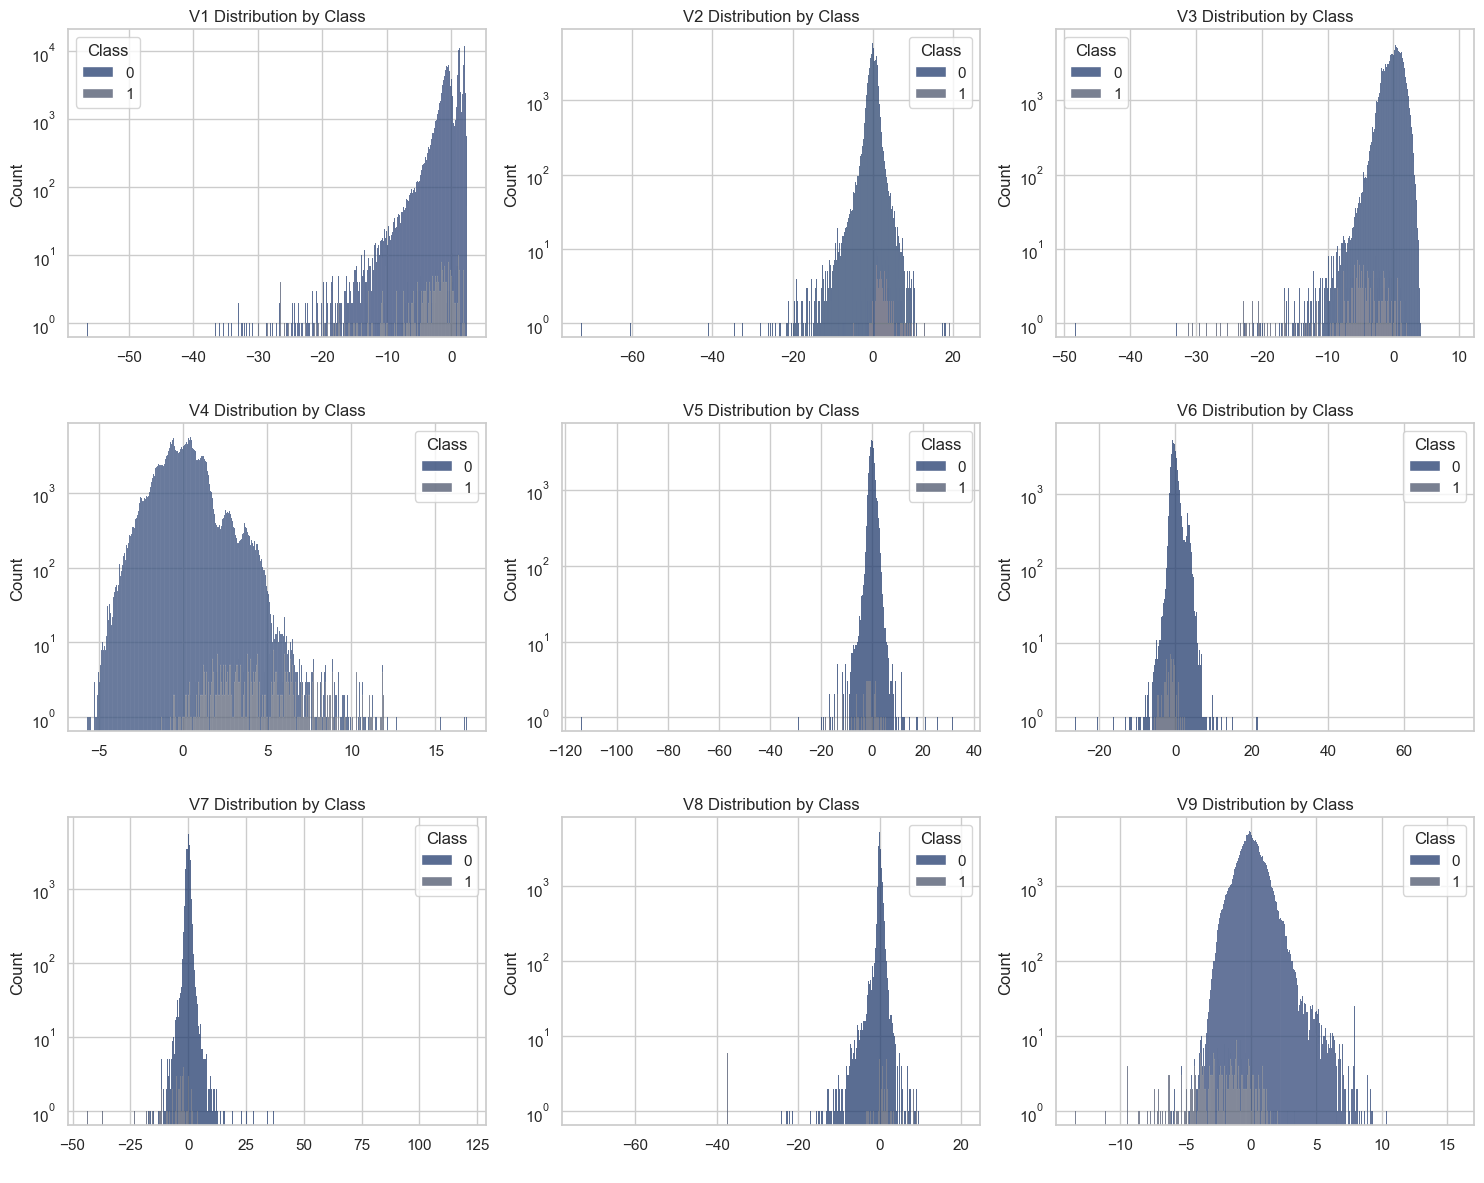

In [55]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9'] 
plot_feature_distributions(df, features)

In [56]:
sns.set_theme(style="whitegrid")
sns.set_palette("magma")

<Figure size 1200x800 with 0 Axes>

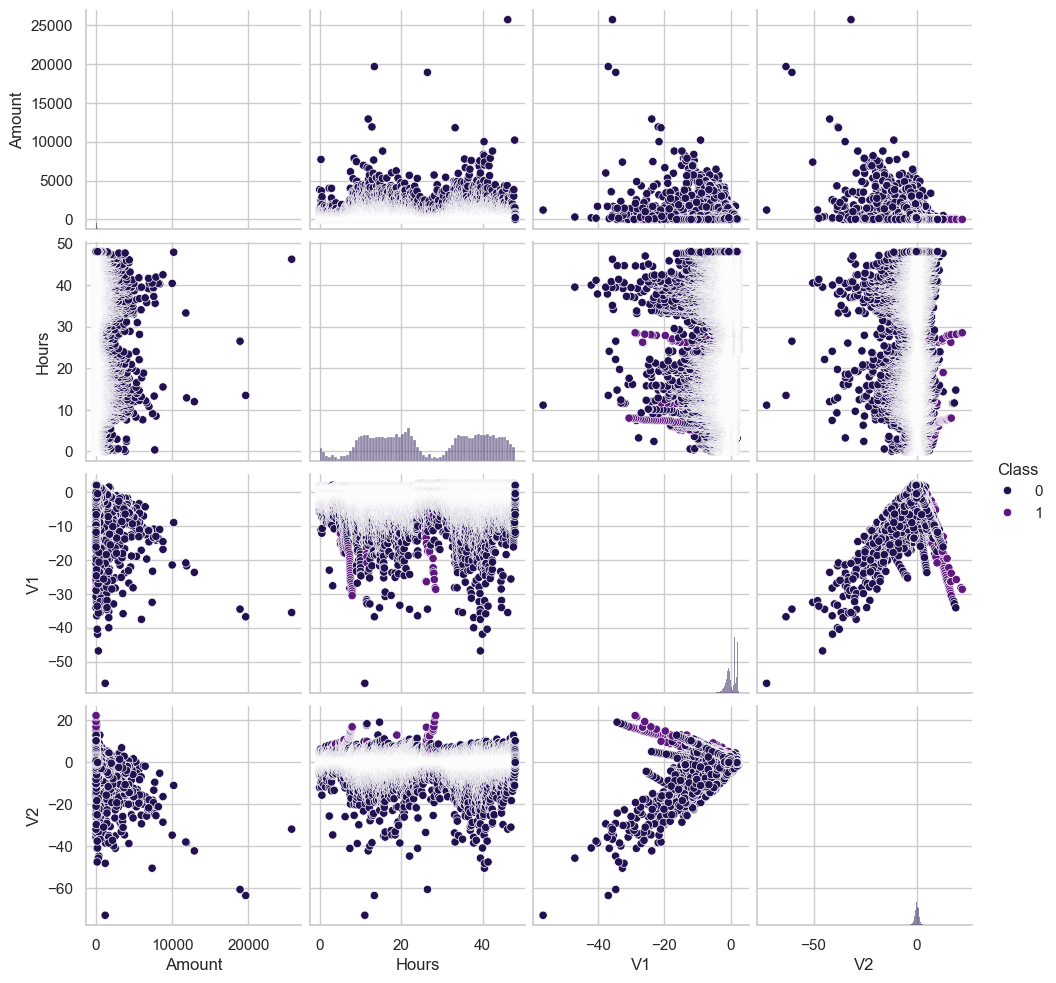

In [57]:
# Pair plots for important features                               
plt.figure(figsize=(12, 8))
selected_features = ['Amount', 'Hours', 'V1', 'V2', 'Class']
sns.pairplot(df[selected_features], hue='Class', diag_kind='hist')
plt.show()

In [58]:
# ------                                    -------
# ------CORRELATION OF V-FEATURES WITH CLASS------

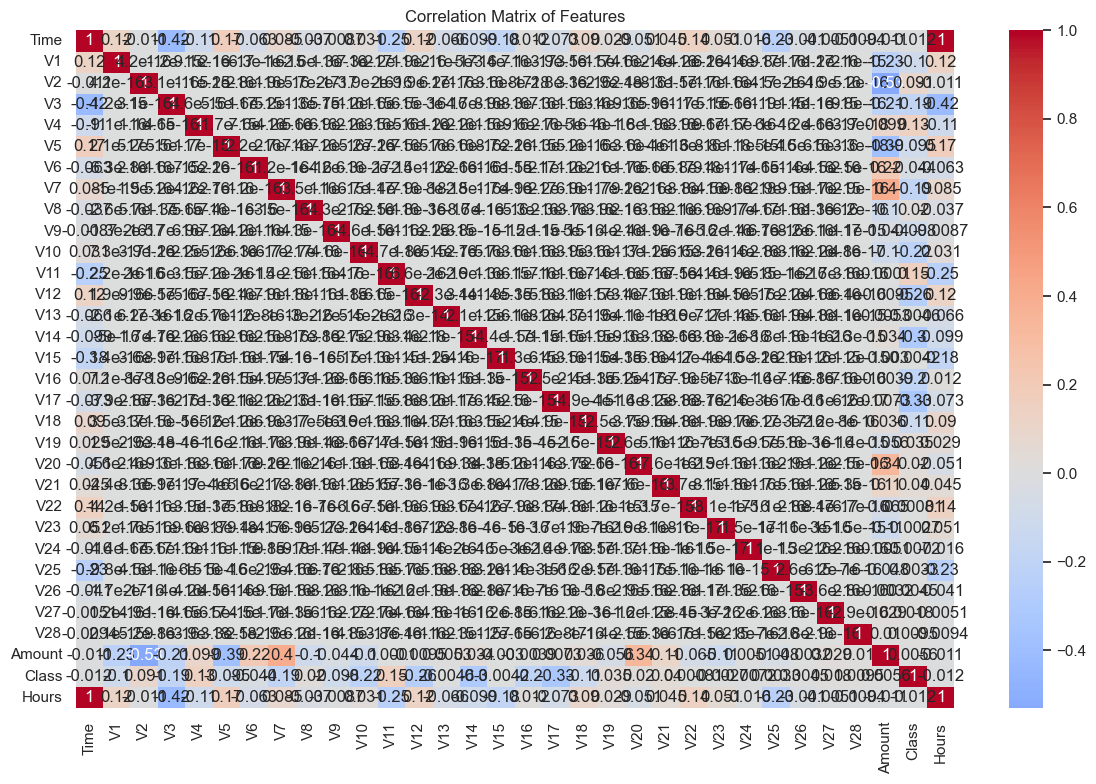

In [59]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

In [60]:
# Get correlation with Class label for V-features
v_features = [col for col in df.columns if col.startswith('V')]
correlations = df[v_features + ['Class']].corr()['Class'].sort_values(ascending=False)

# Display correlations with Class
print("\nCorrelations of V-features with Class:")
print(correlations)


Correlations of V-features with Class:
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
V26      0.004455
V25      0.003308
V22      0.000805
V23     -0.002685
V15     -0.004223
V13     -0.004570
V24     -0.007221
V6      -0.043643
V5      -0.094974
V9      -0.097733
V1      -0.101347
V18     -0.111485
V7      -0.187257
V3      -0.192961
V16     -0.196539
V10     -0.216883
V12     -0.260593
V14     -0.302544
V17     -0.326481
Name: Class, dtype: float64


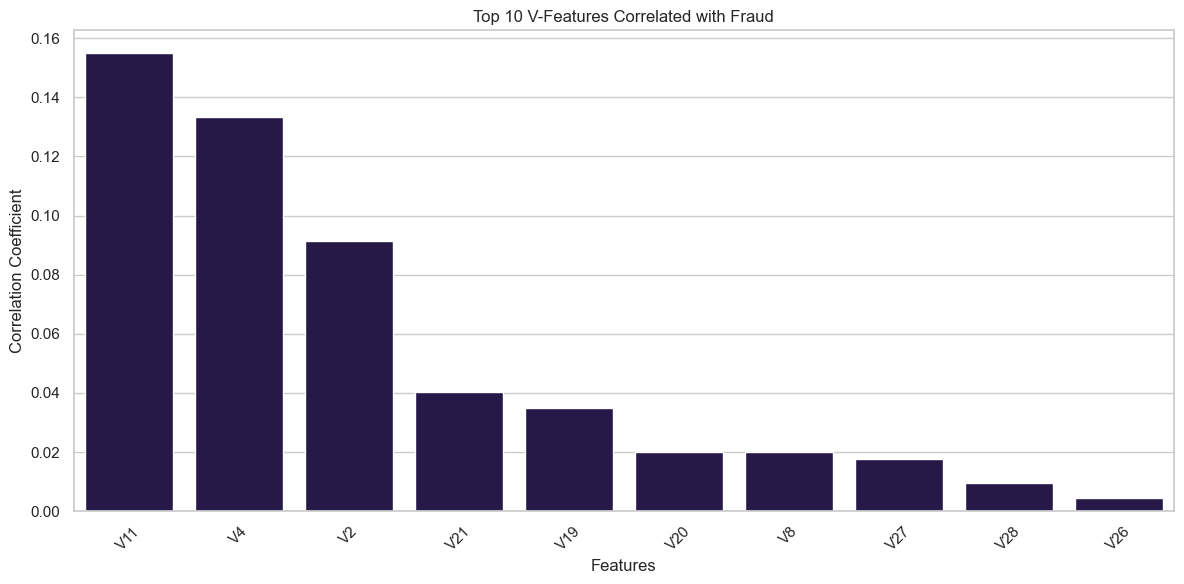

In [61]:
# Plot top 10 most correlated V-features
plt.figure(figsize=(12, 6))
top_10_corr = correlations[1:11]  # Exclude Class itself
sns.barplot(x=top_10_corr.index, y=top_10_corr.values)
plt.xticks(rotation=45)
plt.title('Top 10 V-Features Correlated with Fraud')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

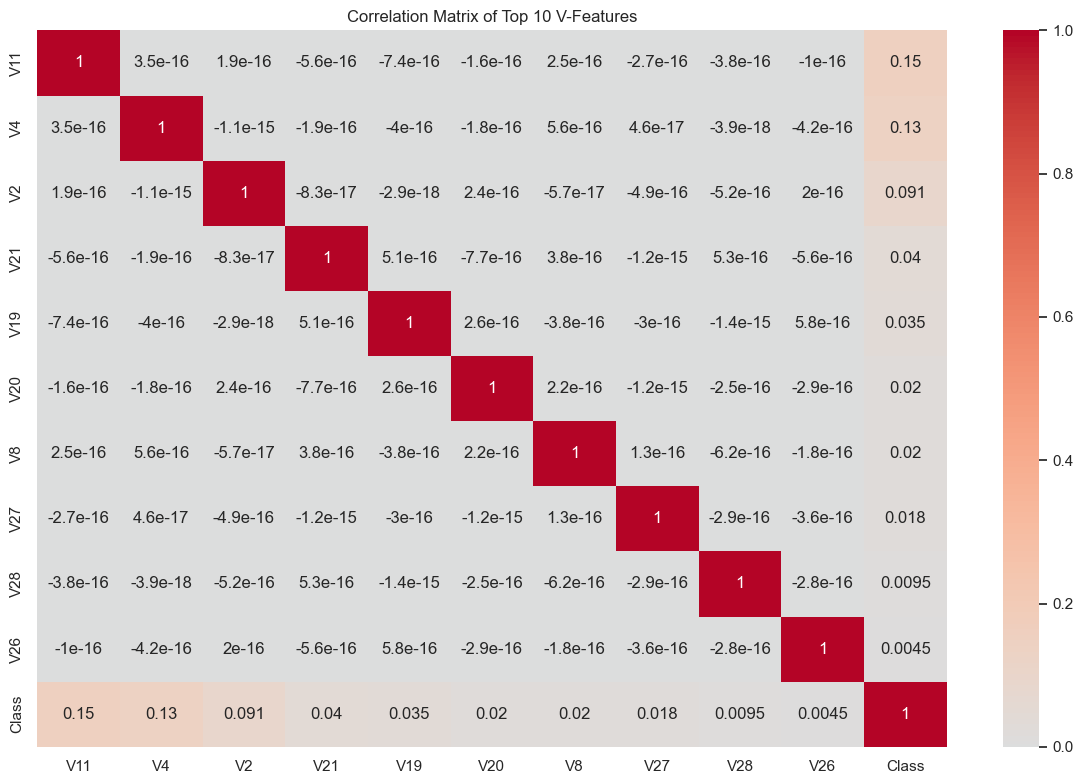

In [62]:
# Create heatmap of top 10 correlated features
plt.figure(figsize=(12, 8))
top_10_features = top_10_corr.index.tolist() + ['Class']
sns.heatmap(df[top_10_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Top 10 V-Features')
plt.tight_layout()
plt.show()

In [63]:
#             -----  FEATURE SELECTION  -----

In [64]:
# Random Forest Feature Importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [65]:
# Prepare features (excluding Class and Time)
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']
y.head()
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hours
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.000278
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.000278
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.000556


In [66]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
import joblib
joblib.dump(scaler, 'scalerrf.pkl')

['scalerrf.pkl']

In [69]:
# Feature importance using Random Forest
rf_feature_imp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_feature_imp.fit(X_scaled, y)

# Get feature importance
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_feature_imp.feature_importances_
}).sort_values('importance', ascending=False)

# Select top features
top_features = importances['feature'].head(15).tolist()
X_selected = X_scaled[top_features]

In [ ]:
# Select top features for modeling
top_features = importances['feature'].head(10).tolist()
X_selected = df[top_features]
y = df['Class']
print("\nTop 10 features selected for modeling:")
print(X_selected.head())


Top 10 features selected for modeling:
        V17       V14       V12       V16       V10       V11        V4  \
0  0.207971 -0.311169 -0.617801 -0.470401  0.090794 -0.551600  1.378155   
1 -0.114805 -0.143772  1.065235  0.463917 -0.166974  1.612727  0.448154   
2  1.109969 -0.165946  0.066084 -2.890083  0.207643  0.624501  0.379780   
3 -0.684093 -0.287924  0.178228 -1.059647 -0.054952 -0.226487 -0.863291   
4 -0.237033 -1.119670  0.538196 -0.451449  0.753074 -0.822843  0.403034   

         V9        V7       V18  
0  0.363787  0.239599  0.025791  
1 -0.255425 -0.078803 -0.183361  
2 -1.514654  0.791461 -0.121359  
3 -1.387024  0.237609  1.965775  
4  0.817739  0.592941 -0.038195  


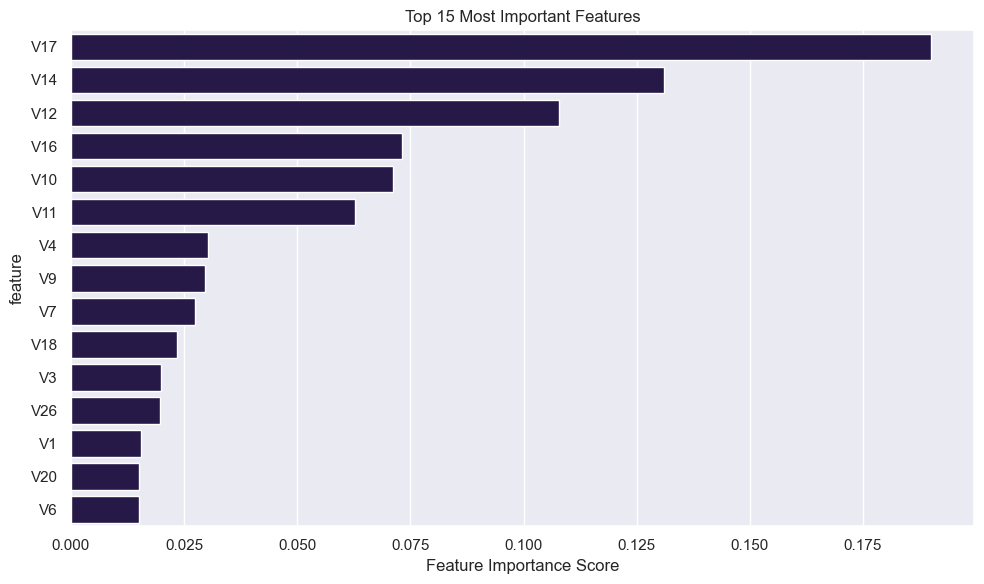

In [ ]:
# feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances.head(15))
plt.title('Top 15 Most Important Features')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()

In [ ]:
# -----  DATA SPLITTING  -----

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# handle class imbalance using SMOTE
smote = SMOTE(
    random_state=42,     
    sampling_strategy='auto',  # Automatically balance classes
    k_neighbors=5,            # Number of neighbors to consider
    n_jobs=-1                # Use all CPU cores
)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
# Print class distribution before and after SMOTE
print("\nClass distribution before SMOTE:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))


Class distribution before SMOTE:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

Class distribution after SMOTE:
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
# Hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [15, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(),
    param_grid,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)
rf_random.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': [15, 20, 30],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [200, 300, 500]},
                   random_state=42, scoring='f1')

In [ ]:
# Get the best parameters and best score
best_params = rf_random.best_params_
best_score = rf_random.best_score_
print("\nBest Parameters:")
print(best_params)
print("\nBest Score:")
print(best_score)


Best Parameters:
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'class_weight': 'balanced'}

Best Score:
0.9997450613674896


In [ ]:
# Create new model with best parameters
best_params = rf_random.best_params_.copy()  # Make a copy to modify safely
best_params['class_weight'] = 'balanced'     # Override class_weight parameter

In [ ]:
# Model training with best parameters
best_rfb = RandomForestClassifier(**best_params, random_state=42)

# Fit the model on the resampled training data
best_rfb.fit(X_train_resampled, y_train_resampled)

# Verify the model parameters
print("\nFinal model parameters:")
print(best_rfb.get_params())


Final model parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
# Get probability scores from balanced model
y_scores = best_rfb.predict_proba(X_test)[:, 1]

# Test multiple thresholds
thresholds = np.arange(0.3, 0.7, 0.05)
threshold_results = []

for threshold in thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    
    # Calculate metrics for each threshold
    results = {
        'threshold': threshold,
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    threshold_results.append(results)
threshold_results_df = pd.DataFrame(threshold_results)
print("\nThreshold results:")
print(threshold_results_df)


Threshold results:
   threshold    recall  precision        f1
0       0.30  0.867347   0.534591  0.661479
1       0.35  0.857143   0.613139  0.714894
2       0.40  0.846939   0.638462  0.728070
3       0.45  0.826531   0.680672  0.746544
4       0.50  0.826531   0.704348  0.760563
5       0.55  0.816327   0.740741  0.776699
6       0.60  0.806122   0.766990  0.786070
7       0.65  0.785714   0.819149  0.802083


In [ ]:
# Find optimal threshold
optimal_idx = threshold_results_df[threshold_results_df['precision'] >= 0.65]['recall'].idxmax()
optimal_threshold = threshold_results_df.loc[optimal_idx, 'threshold']

In [ ]:
# Apply optimal threshold
final_predictions = (y_scores >= optimal_threshold).astype(int)

# Print final results
print(f"\nOptimal threshold: {optimal_threshold:.3f}")
print("\nFinal Model Performance:")
print(classification_report(y_test, final_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, final_predictions))


Optimal threshold: 0.450

Final Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.83      0.75        98

    accuracy                           1.00     56962
   macro avg       0.84      0.91      0.87     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56826    38]
 [   17    81]]


In [ ]:
# Test thresholds between 0.5 and 0.55 with smaller steps to improve precision
# Fine-tune the threshold

fine_thresholds = np.arange(0.50, 0.56, 0.01)
fine_threshold_results = []

for threshold in fine_thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    
    results = {
        'threshold': threshold,
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    fine_threshold_results.append(results)

# Convert to DataFrame
fine_results_df = pd.DataFrame(fine_threshold_results)

# Display detailed results
print("Detailed threshold analysis:")
pd.set_option('display.float_format', '{:.3f}'.format)
print(fine_results_df)

# Find threshold with best balance
optimal_idx = fine_results_df['f1'].idxmax()
new_threshold = fine_results_df.loc[optimal_idx, 'threshold']

# Apply new threshold
final_predictions_adjusted = (y_scores >= new_threshold).astype(int)

# Print comparison
print("\nNew Model Performance (threshold = {:.3f}):".format(new_threshold))
print(classification_report(y_test, final_predictions_adjusted))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, final_predictions_adjusted))

Detailed threshold analysis:
   threshold  precision  recall    f1
0      0.500      0.704   0.827 0.761
1      0.510      0.711   0.827 0.764
2      0.520      0.714   0.816 0.762
3      0.530      0.721   0.816 0.766
4      0.540      0.727   0.816 0.769
5      0.550      0.741   0.816 0.777
6      0.560      0.741   0.816 0.777

New Model Performance (threshold = 0.550):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.82      0.78        98

    accuracy                           1.00     56962
   macro avg       0.87      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56836    28]
 [   18    80]]


#### class 1 precision increased from 0.68 to 0.74

In [ ]:
# --------CROSS VALIDATION--------


Cross-Validation Results:
Accuracy:
  Mean: 1.000 (+/- 0.000)
  Min:  0.999
  Max:  1.000

Precision:
  Mean: 0.931 (+/- 0.046)
  Min:  0.892
  Max:  0.963

Recall:
  Mean: 0.791 (+/- 0.052)
  Min:  0.747
  Max:  0.818

F1:
  Mean: 0.855 (+/- 0.046)
  Min:  0.813
  Max:  0.878

Roc_auc:
  Mean: 0.961 (+/- 0.009)
  Min:  0.956
  Max:  0.967



/var/folders/vx/290sh8j95bvg24gn1z88w0s80000gn/T/ipykernel_14953/1861876784.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cv_scores.values(), labels=cv_scores.keys())


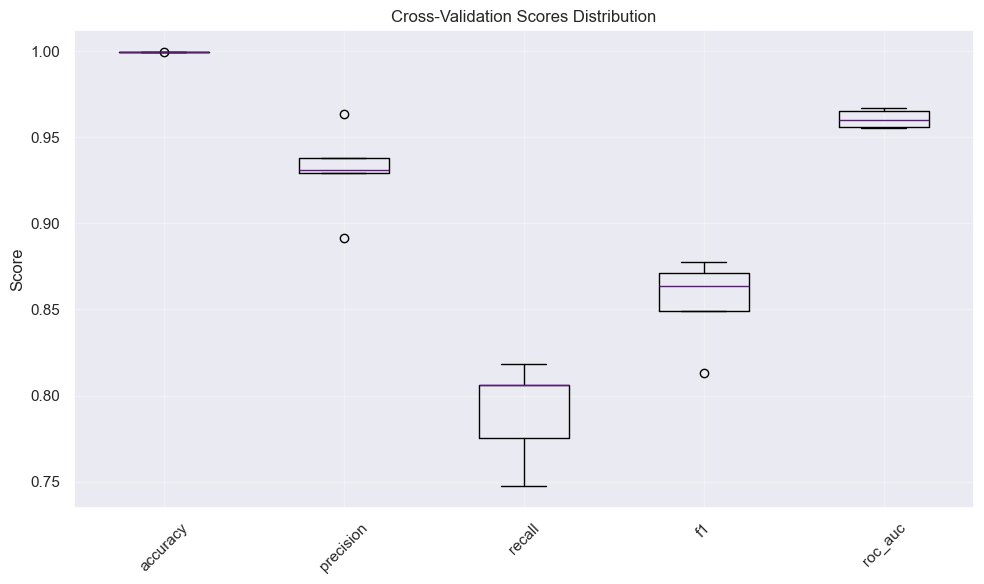

In [ ]:
# Stratified K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize StratifiedKFold for imbalanced dataset
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = {
    'accuracy': cross_val_score(best_rfb, X_selected, y, cv=skf, scoring='accuracy'),
    'precision': cross_val_score(best_rfb, X_selected, y, cv=skf, scoring='precision'),
    'recall': cross_val_score(best_rfb, X_selected, y, cv=skf, scoring='recall'),
    'f1': cross_val_score(best_rfb, X_selected, y, cv=skf, scoring='f1'),
    'roc_auc': cross_val_score(best_rfb, X_selected, y, cv=skf, scoring='roc_auc')
}

# Print cross-validation results
print("\nCross-Validation Results:")
for metric, scores in cv_scores.items():
    print(f"{metric.capitalize()}:")
    print(f"  Mean: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")
    print(f"  Min:  {scores.min():.3f}")
    print(f"  Max:  {scores.max():.3f}")
    print()

# Visualize cross-validation scores
plt.figure(figsize=(10, 6))
plt.boxplot(cv_scores.values(), labels=cv_scores.keys())
plt.title('Cross-Validation Scores Distribution')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

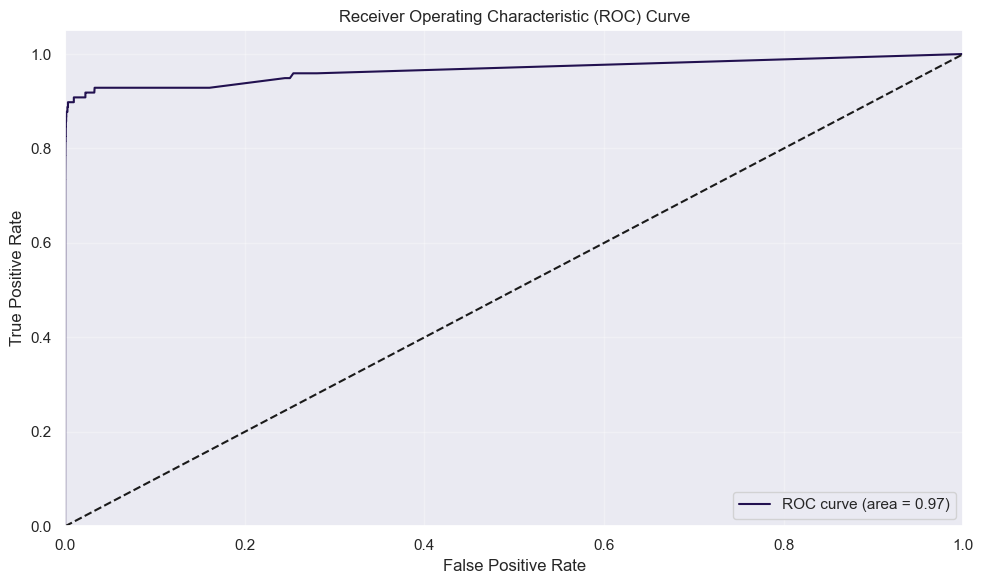

In [ ]:
  # ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Save the model
import joblib
joblib.dump(best_rfb, 'rfcc_model2.pkl')
print("Model saved as ''rfcc_model2.pkl'")
joblib.dump(scaler, 'scalerrf.pkl')
print("Scaler saved as ''scaler.pkl'")


Model saved as ''rfcc_model2.pkl'


In [ ]:
# Load the model
loaded_model = joblib.load('rfcc_model2.pkl')
print("Model loaded from 'rfcc_model2.pkl'")

# Test the loaded model
test_data = X_test.head()
test_predictions = loaded_model.predict(test_data)
print("Test predictions from loaded model:")
print(test_predictions)

# Test the loaded model with a single instance
single_instance = X_test.iloc[0].values.reshape(1, -1)
single_prediction = loaded_model.predict(single_instance)
print("Single instance prediction from loaded model:")
print(single_prediction)

Model loaded from 'rfcc_model2.pkl'
Test predictions from loaded model:
[0 0 0 0 0]
Single instance prediction from loaded model:
[0]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# save final results into a txt file
with open('final_results.txt', 'w') as f:
    f.write("First Optimal Threshold: {:.3f}\n".format(optimal_threshold))
    f.write("New Optimal Threshold: {:.3f}\n".format(new_threshold))
    f.write("Best Parameters:\n")
    f.write(str(best_params) + "\n")
    f.write("Final Model Performance:\n")
    f.write(classification_report(y_test, final_predictions_adjusted))
    f.write("\nConfusion Matrix:\n")
    f.write(str(confusion_matrix(y_test, final_predictions_adjusted)))
    f.write("\nCross-Validation Results:\n")
     
    for metric, scores in cv_scores.items():
        f.write(f"{metric.capitalize()}:\n")
        f.write(f"  Mean: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})\n")
        f.write(f"  Min:  {scores.min():.3f}\n")
        f.write(f"  Max:  {scores.max():.3f}\n")
    f.write("\nROC AUC Score: {:.3f}\n".format(roc_auc))


    

## END

In [ ]:
# Example usage (commented out until needed):
"""
# Load new transactions
new_transactions = pd.read_csv('new_transactions.csv')

# Make predictions
results = predict_fraud(new_transactions)

# Save results
results.to_csv('fraud_predictions.csv', index=False)
print("Predictions saved to 'fraud_predictions.csv'")
"""


In [ ]:
# ----- MODEL DEPLOYMENT INSTRUCTIONS -----
print("""
To use this model in production:

1. Load the saved model and components:
   model_info = joblib.load('credit_card_fraud_model.pkl')
   model = model_info['model']
   scaler = model_info['scaler']
   top_features = model_info['top_features']
   optimal_threshold = model_info['optimal_threshold']

2. Prepare new data:
   - Ensure all required features are present
   - Format should match training data

3. Make predictions using the predict_fraud() function:
   results = predict_fraud(new_data)

4. Interpret results:
   - Fraud_Prediction: 1 for fraud, 0 for legitimate
   - Fraud_Probability: Probability of transaction being fraudulent
""")